In [ ]:
!pip install plotly

In [ ]:
# array, dataframe manipulation
import math
import numpy as np
import os
import pandas as pd
from six import iteritems
from functools import reduce

# cluster
from sklearn import metrics
from sklearn.cluster import OPTICS, cluster_optics_dbscan,DBSCAN 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sns.set(rc={'figure.figsize':(11.7,8.27)})


%matplotlib inline
np.random.seed(9999)

In [ ]:
df = pd.read_csv('cluster.csv',sep=";")
df_for_cluster = df[['alive_pct','purchase_pct']]

print(df.head())
print(df_for_cluster.head())

           name  alive_pct  purchase_pct
0    CROSSANDRA   0.930328      0.921614
1  ALBY DESTINY   0.454918      0.375482
2     PAX SILVA   0.857923      0.827141
3    HK DELIGHT   0.982240      0.974396
4  TAN BINH 277   0.913934      0.884450
   alive_pct  purchase_pct
0   0.930328      0.921614
1   0.454918      0.375482
2   0.857923      0.827141
3   0.982240      0.974396
4   0.913934      0.884450


Why and when to use?

DBSCAN

Used when we don't have to assign number of clusters Manhattan distance if the input variables are not similar in type (such as age, gender, height, etc.). Euclidean distance becomes a poor choice when the number of dimensions increases.

Kmeans

Use when input variables are in similar in type

In [ ]:
def dbscan_kmeans_c(cluster_type,
                    scaled_df,
                    raw_df,
                    k=None,
                    eps=None,
                    min_samples=None,
                    metric=None):
  """
  Input:
  scaled_df:      scaled data frame ready for clustering, sharing same indexes with raw_df
  metric:         'euclidean' for example euclidean distance
  Output:         orginal dataframe with cluster labelling
  """
  try:
    if cluster_type=='dbscan':
      dbscan = DBSCAN(eps,
                      min_samples, 
                      metric=metric)
      c = dbscan.fit(scaled_df)
      
    elif cluster_type=='kmeans':
      kmeans = KMeans(n_clusters=k)
      c = kmeans.fit(scaled_df)
      
    cluster_map = pd.DataFrame()
    cluster_map['cluster'] = c.labels_
    cluster = pd.concat([cluster_map,
                         raw_df],  
                        axis=1)
    return cluster
    
  except ArithmeticError:
    var_exists = False
    
  else:
    var_exists = True
    
  if not var_exists:
    print("no data loaded...")
    return 0


# common functions
def cluster_plot(df):
  #Use seaborn package    
  sns.scatterplot(data=df, 
                  x="alive_pct", 
                  y="purchase_pct",
                  hue="cluster",
                  legend="full",
                  marker="x"
                  )
    

    
def groupby_cluster(df,title):
    print(title)
    agg = { 'alive_pct': 'mean',
           'purchase_pct': 'mean'}

    print('alive number: ')
    print(
          df.groupby('cluster')\
          .agg(agg)\
          .reset_index()\
          .sort_values('cluster', 
                       ascending=False)
         )


    print('density per cluster ')
    df['index'] = df.index
    print(
          df.groupby(['cluster'])['index']\
                        .aggregate('count')\
                        .reset_index()\
                        .sort_values('cluster', 
                                     ascending=True)
          )
    

def silhouette_plot(df):
    
  silhouette_coefficients = []
  
  for k in range(2, 11):
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(df)
      score = silhouette_score(df, 
                               kmeans.labels_)
      silhouette_coefficients.append(score)
      silhouette = silhouette_score(df, 
                                    kmeans.labels_).round(2)
        
  plt.plot(range(2, 11), 
           silhouette_coefficients)
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Coefficient")
  plt.title('silhouette score: '+str(silhouette))
  plt.show()

In [ ]:
dbscan = dbscan_kmeans_c(cluster_type='dbscan',
                         scaled_df=df_for_cluster,
                         raw_df=df,
                         k=None,
                         eps=0.01,
                         min_samples=7,
                         metric='euclidean')

groupby_cluster(df=dbscan,
                title='dbscan')


dbscan
alive number: 
    cluster  alive_pct  purchase_pct
14       13   0.067760      0.051917
13       12   0.213480      0.183842
12       11   0.279385      0.266127
11       10   0.420287      0.406025
10        9   0.512588      0.426912
9         8   0.352231      0.287156
8         7   0.391325      0.370991
7         6   0.094348      0.084645
6         5   0.025370      0.019917
5         4   0.330916      0.314081
4         3   0.477029      0.407767
3         2   0.364906      0.323977
2         1   0.149733      0.144962
1         0   0.910398      0.888620
0        -1   0.412039      0.342147
density per cluster 
    cluster  index
0        -1    280
1         0  20352
2         1     40
3         2      9
4         3     27
5         4     13
6         5     52
7         6     48
8         7     17
9         8     12
10        9     14
11       10     20
12       11      7
13       12      7
14       13      5


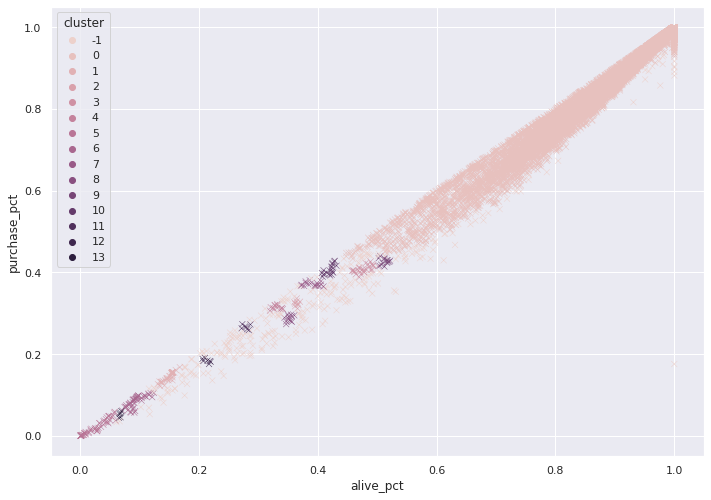

In [ ]:
cluster_plot(dbscan)

Kmeans cluster

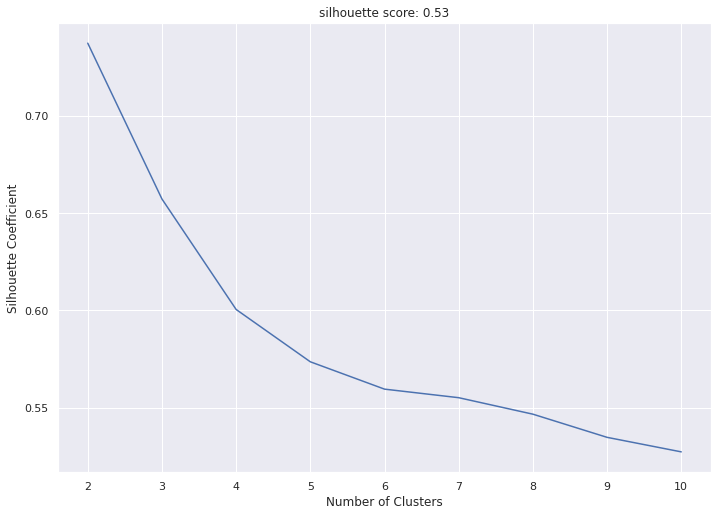

In [ ]:
silhouette_plot(df_for_cluster)

In [ ]:
kmeans = dbscan_kmeans_c(cluster_type='kmeans',
                         scaled_df=df_for_cluster,
                         raw_df=df,
                         k=4,
                         eps=None,
                         min_samples=None,
                         metric=None)

groupby_cluster(kmeans,'kmeans')

kmeans
alive number: 
   cluster  alive_pct  purchase_pct
3        3   0.662047      0.607899
2        2   0.239374      0.207465
1        1   0.965712      0.954420
0        0   0.859843      0.823412
density per cluster 
   cluster  index
0        0   5779
1        1  12854
2        2    423
3        3   1847


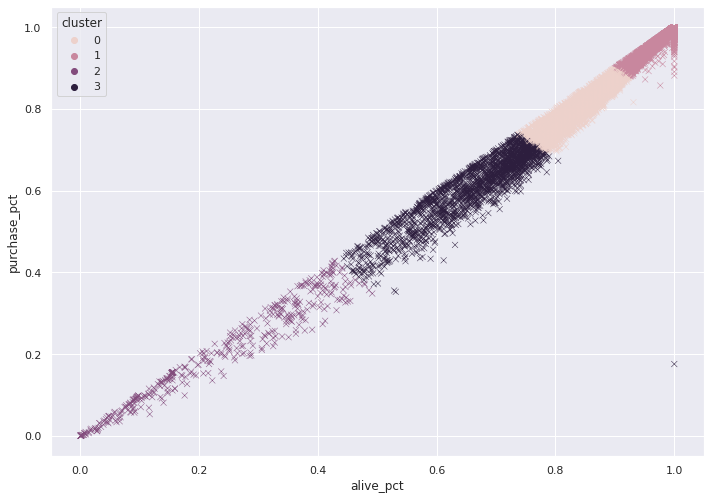

In [ ]:
cluster_plot(kmeans)